In [108]:
import pandas as pd
import numpy as np
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [109]:
dataset = pd.read_csv('./diabetes.csv')

In [110]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [111]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [112]:
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]

In [113]:
zero_not_accepted = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    X[column] = X[column].replace(0, np.NaN)
    mean = int(X[column].mean(skipna=True))
    X[column] = X[column].replace(np.NaN, mean)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

In [115]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [116]:
classifier = SVC(random_state=0, kernel='linear')
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [117]:
y_pred = classifier.predict(X_test)

In [118]:
f1 = metrics.f1_score(y_test, y_pred) # 使用 F1-Score 評估
print("F1-Score: ", f1) 
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

F1-Score:  0.6588235294117647
Accuracy:  0.8116883116883117


In [119]:
from sklearn.model_selection import GridSearchCV

svc_param_grid =[
    {'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10, 100]},
    {'kernel': ['poly'], 'C': [1], 'degree': [2, 3]},
    {'kernel': ['rbf'], 'gamma': [1e-4,1e-3], 'C': [0.01, 0.1, 1, 10, 100]}
]

svc_grid_search = GridSearchCV(SVC(), svc_param_grid, cv=5)
svc_grid_search.fit(X_train, y_train)

print('Best parameters: {}'.format(svc_grid_search.best_params_))
print('Test score: ',svc_grid_search.score(X_test, y_test))


Best parameters: {'C': 10, 'kernel': 'linear'}
Test score:  0.8116883116883117


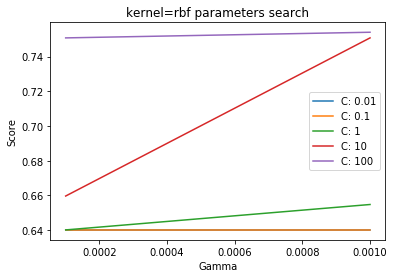

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns


clf_ = SVC(kernel='rbf')
Cs = [0.01, 0.1, 1, 10, 100]
Gammas = [1e-3, 1e-4]

for ind, i in enumerate(Cs):
    plt.plot(Gammas, scores[ind], label='C: ' + str(i))
plt.legend()
plt.title('kernel=rbf parameters search')
plt.xlabel('Gamma')
plt.ylabel('Score')
plt.show()

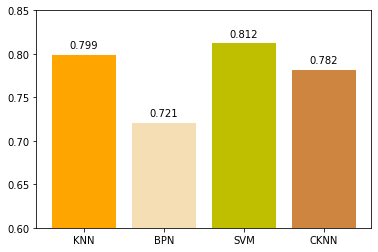

In [127]:
method=["KNN","BPN","SVM","CKNN"]
value=[0.799,0.721,0.812,0.782]
plt.ylim(0.6, 0.85)
plt.bar(x=method,height=value,color=['orange', 'wheat', 'y','peru'])

for a,b in zip(method,value):
    plt.text(a, b+0.005, '%.03f' % b, ha='center', va= 'bottom',fontsize=10)